https://www.datacamp.com/community/tutorials/xgboost-in-python
does this tutorial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv('../data/df_samp.csv').head(10000)
df.head().transpose()

,0,1,2,3,4
site_id,0,0,0,0,0
building_id,7,31,55,96,103
primary_use,Education,Education,Office,Lodging/residential,Education
square_feet,121074,61904,16726,200933,21657
meter,chilledwater,chilledwater,chilledwater,chilledwater,chilledwater
timestamp,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00
meter_reading,1857.26,1097.47,337.683,1266.31,337.683
meter_reading_roll_avg,2219.77,1719.04,510.663,2245.43,349.27
outlier_ratio,0.836691,0.638421,0.661264,0.563951,0.966825
air_temperature,12.8,12.8,12.8,12.8,12.8


In [14]:
cat_columns = ['primary_use','meter','hour','weekday','month','wind_compass']

In [15]:
df_processed = pd.get_dummies(df, prefix_sep="_", columns=cat_columns)
df_processed.head().transpose()

,0,1,2,3,4
site_id,0,0,0,0,0
building_id,7,31,55,96,103
square_feet,121074,61904,16726,200933,21657
timestamp,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00,2016-02-29 09:00:00
meter_reading,1857.26,1097.47,337.683,1266.31,337.683
meter_reading_roll_avg,2219.77,1719.04,510.663,2245.43,349.27
outlier_ratio,0.836691,0.638421,0.661264,0.563951,0.966825
air_temperature,12.8,12.8,12.8,12.8,12.8
dew_temperature,8.9,8.9,8.9,8.9,8.9
sea_level_pressure,1021.9,1021.9,1021.9,1021.9,1021.9


In [16]:
df_processed.columns

Index(['site_id', 'building_id', 'square_feet', 'timestamp', 'meter_reading',
       'meter_reading_roll_avg', 'outlier_ratio', 'air_temperature',
       'dew_temperature', 'sea_level_pressure', 'wind_speed', 'HDD', 'CDD',
       'primary_use_Education', 'primary_use_Lodging/residential',
       'primary_use_Office', 'meter_chilledwater', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2',
       'month_3', 'month_4', 'month_5', 'wind_compass_East',
       'wind_compass_North', 'wind_compass_Northeast',
       'wind_compass_Northwest', 'wind_compass_South',
       'wind_compass_Southeast', 'wind_compass_Southwest',
       'wind_compass_West'],
      dty

In [17]:
X=df_processed.drop(['meter_reading','outlier_ratio','meter_reading_roll_avg','timestamp'],axis=1)
X.head()

,site_id,building_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_speed,HDD,CDD,primary_use_Education,...,month_4,month_5,wind_compass_East,wind_compass_North,wind_compass_Northeast,wind_compass_Northwest,wind_compass_South,wind_compass_Southeast,wind_compass_Southwest,wind_compass_West
0,0,7,121074,12.8,8.9,1021.9,0.0,5.2,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,31,61904,12.8,8.9,1021.9,0.0,5.2,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,55,16726,12.8,8.9,1021.9,0.0,5.2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,96,200933,12.8,8.9,1021.9,0.0,5.2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,103,21657,12.8,8.9,1021.9,0.0,5.2,0.0,1,...,0,0,0,1,0,0,0,0,0,0


In [18]:
X.columns

Index(['site_id', 'building_id', 'square_feet', 'air_temperature',
       'dew_temperature', 'sea_level_pressure', 'wind_speed', 'HDD', 'CDD',
       'primary_use_Education', 'primary_use_Lodging/residential',
       'primary_use_Office', 'meter_chilledwater', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2',
       'month_3', 'month_4', 'month_5', 'wind_compass_East',
       'wind_compass_North', 'wind_compass_Northeast',
       'wind_compass_Northwest', 'wind_compass_South',
       'wind_compass_Southeast', 'wind_compass_Southwest',
       'wind_compass_West'],
      dtype='object')

In [19]:
y=df_processed['meter_reading']
y.head().transpose()

0    1857.260
1    1097.470
2     337.683
3    1266.310
4     337.683
Name: meter_reading, dtype: float64

In [38]:
scores = []
model = XGBRegressor(eta =0.1,verbosity=1)
cv = KFold(n_splits=10, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.values[train_index], X.values[test_index], y.values[train_index], y.values[test_index]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    scores.append(mean_squared_error(y_test,predictions,squared=False))

Train Index:  [1000 1001 1002 ... 9997 9998 9999] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

Train Index:  [   0    1    2 ... 9997 9998 9999] 

Test Index:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027
 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041
 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055
 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069
 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083
 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097
 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111
 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125
 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139
 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153
 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167
 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181
 2182 2183 2

Train Index:  [   0    1    2 ... 9997 9998 9999] 

Test Index:  [4000 4001 4002 4003 4004 4005 4006 4007 4008 4009 4010 4011 4012 4013
 4014 4015 4016 4017 4018 4019 4020 4021 4022 4023 4024 4025 4026 4027
 4028 4029 4030 4031 4032 4033 4034 4035 4036 4037 4038 4039 4040 4041
 4042 4043 4044 4045 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055
 4056 4057 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069
 4070 4071 4072 4073 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083
 4084 4085 4086 4087 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097
 4098 4099 4100 4101 4102 4103 4104 4105 4106 4107 4108 4109 4110 4111
 4112 4113 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123 4124 4125
 4126 4127 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137 4138 4139
 4140 4141 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151 4152 4153
 4154 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167
 4168 4169 4170 4171 4172 4173 4174 4175 4176 4177 4178 4179 4180 4181
 4182 4183 4

Train Index:  [   0    1    2 ... 9997 9998 9999] 

Test Index:  [6000 6001 6002 6003 6004 6005 6006 6007 6008 6009 6010 6011 6012 6013
 6014 6015 6016 6017 6018 6019 6020 6021 6022 6023 6024 6025 6026 6027
 6028 6029 6030 6031 6032 6033 6034 6035 6036 6037 6038 6039 6040 6041
 6042 6043 6044 6045 6046 6047 6048 6049 6050 6051 6052 6053 6054 6055
 6056 6057 6058 6059 6060 6061 6062 6063 6064 6065 6066 6067 6068 6069
 6070 6071 6072 6073 6074 6075 6076 6077 6078 6079 6080 6081 6082 6083
 6084 6085 6086 6087 6088 6089 6090 6091 6092 6093 6094 6095 6096 6097
 6098 6099 6100 6101 6102 6103 6104 6105 6106 6107 6108 6109 6110 6111
 6112 6113 6114 6115 6116 6117 6118 6119 6120 6121 6122 6123 6124 6125
 6126 6127 6128 6129 6130 6131 6132 6133 6134 6135 6136 6137 6138 6139
 6140 6141 6142 6143 6144 6145 6146 6147 6148 6149 6150 6151 6152 6153
 6154 6155 6156 6157 6158 6159 6160 6161 6162 6163 6164 6165 6166 6167
 6168 6169 6170 6171 6172 6173 6174 6175 6176 6177 6178 6179 6180 6181
 6182 6183 6

Train Index:  [   0    1    2 ... 9997 9998 9999] 

Test Index:  [8000 8001 8002 8003 8004 8005 8006 8007 8008 8009 8010 8011 8012 8013
 8014 8015 8016 8017 8018 8019 8020 8021 8022 8023 8024 8025 8026 8027
 8028 8029 8030 8031 8032 8033 8034 8035 8036 8037 8038 8039 8040 8041
 8042 8043 8044 8045 8046 8047 8048 8049 8050 8051 8052 8053 8054 8055
 8056 8057 8058 8059 8060 8061 8062 8063 8064 8065 8066 8067 8068 8069
 8070 8071 8072 8073 8074 8075 8076 8077 8078 8079 8080 8081 8082 8083
 8084 8085 8086 8087 8088 8089 8090 8091 8092 8093 8094 8095 8096 8097
 8098 8099 8100 8101 8102 8103 8104 8105 8106 8107 8108 8109 8110 8111
 8112 8113 8114 8115 8116 8117 8118 8119 8120 8121 8122 8123 8124 8125
 8126 8127 8128 8129 8130 8131 8132 8133 8134 8135 8136 8137 8138 8139
 8140 8141 8142 8143 8144 8145 8146 8147 8148 8149 8150 8151 8152 8153
 8154 8155 8156 8157 8158 8159 8160 8161 8162 8163 8164 8165 8166 8167
 8168 8169 8170 8171 8172 8173 8174 8175 8176 8177 8178 8179 8180 8181
 8182 8183 8

In [39]:
print(scores)

[321.5245705815297, 495.3846912921271, 429.6143309265724, 447.22254243181607, 353.33211406587407, 328.6833300117753, 417.37951008634, 774.5829449224241, 605.2508066002977, 690.2049731660077]


In [40]:
scores = []
model = XGBRegressor()
cv = KFold(n_splits=10, shuffle=False)
cross_val_score(model, X.values, y.values,scoring="neg_root_mean_squared_error", cv=10)

array([-319.73686341, -475.09663517, -426.47051882, -448.97287726,
       -357.91204582, -328.77326531, -407.73645493, -831.83887971,
       -632.59998395, -719.91340478])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
model = XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions

[111.0,
 604.0,
 204.0,
 84.0,
 26.0,
 134.0,
 615.0,
 497.0,
 473.0,
 403.0,
 2500.0,
 52.0,
 559.0,
 147.0,
 12.0,
 20.0,
 39.0,
 196.0,
 76.0,
 34.0,
 4.0,
 50.0,
 2885.0,
 697.0,
 -152.0,
 160.0,
 35.0,
 22.0,
 52.0,
 3.0,
 104.0,
 81.0,
 136.0,
 426.0,
 117.0,
 8.0,
 2273.0,
 51.0,
 141.0,
 -4.0,
 302.0,
 260.0,
 33.0,
 235.0,
 82.0,
 426.0,
 172.0,
 173.0,
 3.0,
 89.0,
 -54.0,
 83.0,
 19.0,
 161.0,
 739.0,
 33.0,
 227.0,
 -21.0,
 36.0,
 36.0,
 128.0,
 60.0,
 84.0,
 241.0,
 36.0,
 477.0,
 30.0,
 485.0,
 283.0,
 181.0,
 20.0,
 18.0,
 68.0,
 61.0,
 67.0,
 965.0,
 238.0,
 945.0,
 75.0,
 42.0,
 1265.0,
 74.0,
 78.0,
 1219.0,
 255.0,
 11.0,
 1931.0,
 46.0,
 528.0,
 64.0,
 77.0,
 108.0,
 401.0,
 39.0,
 1.0,
 127.0,
 220.0,
 141.0,
 227.0,
 83.0,
 310.0,
 6.0,
 402.0,
 82.0,
 75.0,
 30.0,
 21.0,
 906.0,
 36.0,
 38.0,
 368.0,
 226.0,
 48.0,
 48.0,
 367.0,
 27.0,
 207.0,
 -12.0,
 44.0,
 1282.0,
 21.0,
 830.0,
 67.0,
 268.0,
 184.0,
 111.0,
 27.0,
 107.0,
 1956.0,
 360.0,
 322.0,
 388.0,
 6

In [21]:
explained_variance_score(y_test,predictions)

0.8922140239111443

In [22]:
mean_absolute_error(y_test,predictions)

118.5887571731008

In [28]:
r2_score(y_test,predictions)

0.8922140223384999

In [29]:
mean_squared_error(y_test,predictions,squared=False)

313.335380436887

In [30]:
results = pd.DataFrame(data = {'actual':y_test,'predictions':predictions})

In [31]:
results = results.reset_index(drop=True).head(10000)

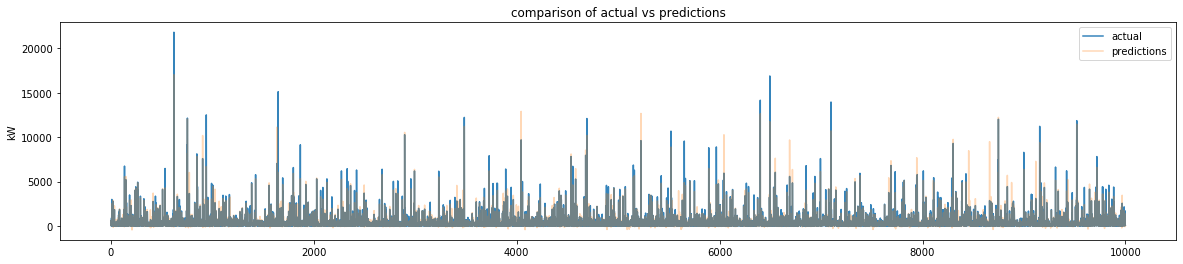

In [32]:
# line 1 points
plt.figure(figsize=(20,4))
x1 = results.index
y1 = results['actual']
# plotting the line 1 points 
plt.plot(x1, y1, label = "actual", alpha = .9)
# line 2 points
x2 = results.index
y2 = results['predictions']
# plotting the line 2 points 
plt.plot(x2, y2, label = "predictions", alpha = .3)

# Set the y axis label of the current axis.
plt.ylabel('kW')
# Set a title of the current axes.
plt.title('comparison of actual vs predictions')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
try kfold

https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833